In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch
import torchvision.transforms as transforms
import math


# Homework 10 - Convolutional Neural Networks 1


Your task is to fill out the missing parts of the code. This time you will be building a simple convolutional neural network.

This will be a the first time that you will build a simple neural network using the torch library.
I suggest first to solve the task on MNIST dataset (28x28x1 images) and then on CIFAR-10 dataset (32x32x3 images).
It's better to first try on MNIST, so you can iterate faster on the solution, and then move to CIFAR-10.
- You are expected to reach at least 90% accuracy on the test set for MNIST (use_cifar=False).
- If you succeed on MNIST, you are expected to reach at least 40% accuracy on the test set for CIFAR-10 (use_cifar=True). This will take potentially more
time (depending on your hardware), but you should still be able to reach at least 40% accuracy on the test set.

It is a simple task, so don't try to make the model too big (i.e. one or two convolutional layers with 4, 8 or 16 filters should be enough).

Once you're done with the task, compute (estimate) the number of parameters in the model. Compare it with the number of parameters in the homework 9.

In [3]:
def load_data(batch_size=64, val_size=1000, cifar=False):
    """
    Loads dataset and returns DataLoader objects.

    :param batch_size: Number of samples per batch
    :param val_size: Number of samples for validation set
    :param cifar: If True, loads CIFAR-10 dataset, otherwise MNIST
    :returns: train_loader, test_loader, val_loader
    """
    print(f"Loading {'CIFAR-10' if cifar else 'MNIST'} dataset...")
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            if not cifar
            else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
    dataset_object = (
        torchvision.datasets.CIFAR10 if cifar else torchvision.datasets.MNIST
    )

    train_dataset = dataset_object(
        root="./data", train=True, download=True, transform=transform
    )
    test_dataset = dataset_object(
        root="./data", train=False, download=True, transform=transform
    )
    train_dataset, val_dataset = torch.utils.data.random_split(
        train_dataset, [len(train_dataset) - val_size, val_size]
    )

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=2
    )
    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=batch_size, shuffle=True, num_workers=2
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=2
    )
    print(
        f"Train size: {len(train_dataset)}, Validation size: {len(val_dataset)}, Test size: {len(test_dataset)}"
    )
    return train_loader, test_loader, val_loader

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self, num_channels: int, output_size: int):
        super(SimpleCNN, self).__init__()
        """
        A simple CNN model with batch normalization and dropout for improved efficiency.
        
        Feel free to use any tricks that you know, but mandatory is to use:
        - Convolutional layer(s)
        - Non-linear activation function
        - Pooling layer(s)
        - Fully connected layer
        
        At the end of the network you need to convert activation maps into a vector and 
        then pass it through the fully connected layer to get the class scores.
        
        Make this network work both with MNIST and CIFAR-10 datasets (however you like it,
        but do not create a new network for each dataset).

        :param num_channels: Number of input channels
        :param output_size: Number of output classes
        """
        # <your_code_here>
        device = torch.device("cpu") #torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.conv1 = nn.Conv2d(num_channels, 8, kernel_size=5, stride=1, padding=1).to(device) 
        self.pool = nn.MaxPool2d(kernel_size=2).to(device)
        self.relu = nn.ReLU().to(device)
        self.fc1 = nn.Linear(1800, 1024).to(device)
        self.fc2 = nn.Linear(output_size, 10).to(device)
        
        # </your_code_here>

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the model.

        :param x: Input tensor of shape (batch_size, channels, height, width)
        :returns: Output tensor of shape (batch_size, output_size)
        """
        # <your_code_here>
        batch_size=x.size(0)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.relu(x)
        # </your_code_here>
        return x


In [5]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    """
    Trains the MLP model on the training data.

    :param model: The neural network model
    :param train_loader: DataLoader for training data
    :param val_loader: DataLoader for validation data
    :param criterion: Loss function
    :param optimizer: Optimizer
    :param num_epochs: Number of training epochs
    """
    # we need to set the model to training mode
    model.train()
    running_loss = []
    running_validation = []
    for epoch in range(num_epochs):
        running_loss_epoch = 0.0
        running_validation_epoch = 0.0
        for images, labels in train_loader:
            """
            Implement the training loop.
            It should include:
            1. Forward pass (passing the images through the model)
            2. Loss computation (using the criterion input function)
            3. Backward pass (computing the gradients)
            4. Optimization step (updating the model parameters)
            
            Note: you will be using the torch optimizer.
            First you need to zero the gradients in the optimizer (clear the gradients from the previous epoch)
            Then you need to call the backward pass on the loss (compute the gradients)
            Finally, you need to call the step function on the optimizer (to update the model parameters)
            """
            # <your_code_here>
            #images = images.view(images.size(0), -1)
            #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            
            #images = images.to(device)
            
            
            outputs = model.forward(images)
            #print(labels)
            #labels = labels.type(torch.FloatTensor) 
            #outputs = outputs.type(torch.FloatTensor) 
            #print(outputs, labels)
            labels = labels
            loss = criterion(outputs, labels)
            #loss.requires_grad = True
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # </your_code_here>

            running_loss_epoch += loss.item()

        for images, labels in val_loader:
            """
            Implement the validation loop.
            It should include:
            1. Forward pass (passing the images through the model)
            2. Loss computation
            """
            # <your_code_here>
            optimizer.zero_grad()
            #print(images.shape)
            outputs = model.forward(images)
            labels = labels
            #labels = labels.type(torch.FloatTensor) 
            loss = criterion(outputs, labels)
            # </your_code_here>
            running_validation_epoch += loss.item()

        average_loss = running_loss_epoch / len(train_loader)
        average_validation = running_validation_epoch / len(val_loader)
        running_loss.append(average_loss)
        running_validation.append(average_validation)

        print(
            f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Validation Loss: {average_validation:.4f}"
        )

    print("Finished Training")
    return running_loss, running_validation


In [6]:
def evaluate_model(model, test_loader):
    """
    Evaluates the trained model on the test data.

    :param model: The neural network model
    :param test_loader: DataLoader for test data
    """
    # we need to set the model to evaluation mode
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the test images: {100 * correct / total:.2f}%")

In [9]:
use_cifar = True  # try on MNIST first, then on CIFAR-10 (set to True)
# <your_code_here>
# learning rate is the step size for the optimizer
learning_rate = 0.001
# the higher the learning rate, the longer the training (and the more likely to overfit)
num_epochs = 10
# the higher the batch_size, the faster the training, but the memory consumption is higher
batch_size = 128
# </your_code_here>
output_size = 10  # MNIST has 10 classes (digits 0-9), CIFAR-10 has 10 classes (objects)


# Load data
train_loader, test_loader, val_loader = load_data(
    batch_size=batch_size, cifar=use_cifar
)

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_channels=1 if not use_cifar else 3, output_size=output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
running_loss, running_validation_loss = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs
)


Loading CIFAR-10 dataset...
Files already downloaded and verified
Files already downloaded and verified
Train size: 49000, Validation size: 1000, Test size: 10000
Epoch [1/10], Loss: 1.8692, Validation Loss: 1.5996
Epoch [2/10], Loss: 1.4714, Validation Loss: 1.4413
Epoch [3/10], Loss: 1.3713, Validation Loss: 1.3614
Epoch [4/10], Loss: 1.3124, Validation Loss: 1.3260
Epoch [5/10], Loss: 1.2764, Validation Loss: 1.3225
Epoch [6/10], Loss: 1.2419, Validation Loss: 1.2654
Epoch [7/10], Loss: 1.2128, Validation Loss: 1.2683
Epoch [8/10], Loss: 1.1922, Validation Loss: 1.2511
Epoch [9/10], Loss: 1.1748, Validation Loss: 1.2173
Epoch [10/10], Loss: 1.1536, Validation Loss: 1.2328
Finished Training


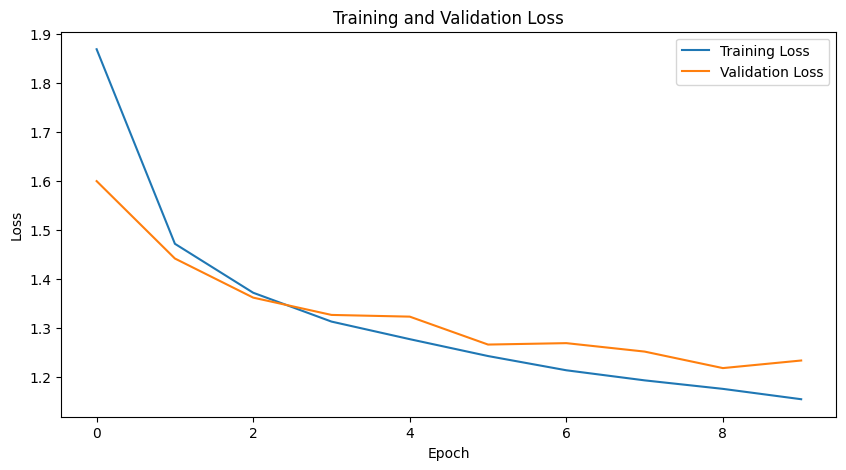

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(running_loss, label="Training Loss")
plt.plot(running_validation_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
# Evaluate the model
evaluate_model(model, test_loader)

Accuracy of the model on the test images: 57.24%


Let's visualize the weight matrix of the first layer conv1.weight
Think about what the weight matrix means in this context.
Showing 8 filters


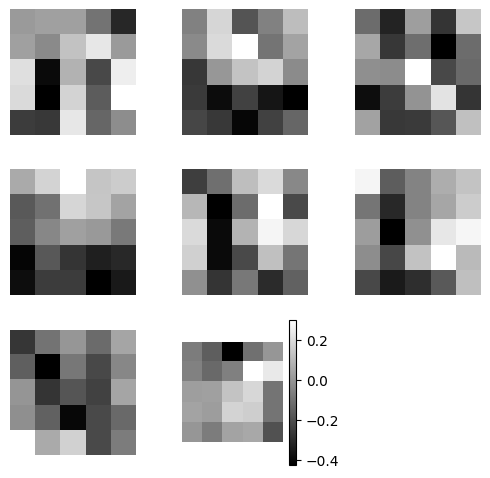

In [12]:
print("Let's visualize the weight matrix of the first layer conv1.weight")
print("Think about what the weight matrix means in this context.")
param = model.conv1.weight.data
param_shape = param.shape[-1]
filters = param.view(-1, param_shape, param_shape)

num_images = param.shape[0]
print(f"Showing {num_images} filters")
num_images_columns = math.ceil(np.sqrt(num_images))
num_images_rows = math.ceil(num_images / num_images_columns)
plt.figure(figsize=(5, 5))
for i in range(num_images):
    plt.subplot(num_images_rows, num_images_columns, i + 1)
    plt.imshow(param[i][0].detach().numpy(), cmap="gray")
    plt.axis("off")  # Remove tickers (axis labels and ticks)
plt.colorbar()
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
